## Import libraries

In [1]:
# data manipulation
import pandas as pd
import numpy as np
import datetime
import math as m

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# pipeline construction
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

# data processing
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

# models
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# optimization and hyperparameters
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

# model evaluation
import sklearn.metrics as metrics
from sklearn.metrics import plot_confusion_matrix

# settings
%matplotlib inline
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)

D:\Programy\Anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Dataset

In [2]:
dataset = pd.read_csv('data/dataset/dataset.csv', index_col='Date')
dataset.index = pd.to_datetime(dataset.index, format='%Y-%m-%d')
dataset

,Open,High,Low,Close,Volume,spx_Open,spx_High,spx_Low,spx_Close,spx_Volume,dax_Open,dax_High,dax_Low,dax_Close,dax_Volume,PMI_PL,PMI_US,CLI_PL,WIG_20_P/E,WIG_20_P/BV,WIG_20_DY,assets_to_personal_income,PL10TY_PL2TY
Date,,,,,,,,,,,,,,,,,,,,,,,
2007-10-19,4379.67,4379.67,4379.67,4379.67,29456097.0,1540.08,1540.08,1500.26,1500.63,2.311650e+09,7895.52,7940.29,7870.73,7884.12,268825856.0,51.5,54.2,100.809682,21.958,3.741,2.055,5.123741,0.356
2007-10-22,4362.07,4362.07,4362.07,4362.07,37825830.0,1500.63,1508.06,1490.40,1506.33,1.928794e+09,7819.27,7819.27,7763.64,7794.93,294604256.0,51.5,54.2,100.809682,21.886,3.723,2.060,5.123741,0.307
2007-10-23,4476.13,4476.13,4476.13,4476.13,31809295.0,1506.33,1520.01,1503.61,1519.59,1.838400e+09,7822.89,7876.62,7822.89,7842.79,243051520.0,51.5,54.2,100.809682,22.344,3.799,2.005,5.123741,0.185
2007-10-24,4443.34,4443.34,4443.34,4443.34,26511409.0,1519.59,1519.59,1489.56,1515.88,2.224056e+09,7842.12,7861.27,7807.99,7828.96,257861712.0,51.5,54.2,100.809682,22.178,3.772,2.015,5.123741,0.119
2007-10-25,4468.73,4468.73,4468.73,4468.73,29651370.0,1515.88,1523.24,1500.46,1514.40,2.324422e+09,7862.60,7970.56,7861.39,7932.43,401154880.0,51.5,54.2,100.809682,22.141,3.765,1.985,5.123741,0.056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-19,3746.76,3746.76,3626.70,3626.70,32703284.0,3781.88,3804.53,3780.37,3798.91,2.485142e+09,13935.93,13940.05,13804.46,13815.06,87347650.0,51.7,59.5,99.628343,24.783,1.426,0.655,5.570101,1.092
2021-01-20,3642.58,3655.91,3591.53,3637.63,26554080.0,3816.22,3859.75,3816.22,3851.85,2.350472e+09,13848.77,13952.20,13835.99,13921.37,87347650.0,51.7,59.5,99.628343,24.812,1.436,0.655,5.570101,1.107
2021-01-21,3669.81,3675.13,3569.97,3577.93,25603661.0,3857.46,3861.45,3845.05,3853.07,2.591056e+09,13997.78,14026.35,13878.84,13906.67,87347650.0,51.7,59.5,99.628343,24.465,1.405,0.670,5.570101,1.132


In [3]:
dataset.describe()

,Open,High,Low,Close,Volume,spx_Open,spx_High,spx_Low,spx_Close,spx_Volume,dax_Open,dax_High,dax_Low,dax_Close,dax_Volume,PMI_PL,PMI_US,CLI_PL,WIG_20_P/E,WIG_20_P/BV,WIG_20_DY,assets_to_personal_income,PL10TY_PL2TY
count,3214.000000,3214.000000,3214.000000,3214.000000,3.214000e+03,3214.000000,3214.000000,3214.000000,3214.000000,3.214000e+03,3214.000000,3214.000000,3214.000000,3214.000000,3.214000e+03,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,3416.601739,3425.537775,3405.462324,3415.159175,2.998686e+07,1921.986767,1932.832866,1910.067946,1922.217754,2.262598e+09,9142.991329,9206.824907,9072.526459,9141.538086,1.201367e+08,50.471889,54.819477,99.761014,14.645442,1.460005,2.879045,5.120316,0.982293
std,544.041885,547.439352,539.748394,543.481045,2.042270e+07,727.065244,729.142995,724.877080,727.236469,6.417082e+08,2728.349865,2733.256226,2723.281232,2727.909297,6.932656e+07,3.797102,8.364035,1.004457,3.536665,0.364068,1.111135,0.372116,0.511382
min,1577.740000,1577.740000,1577.740000,1577.740000,6.488816e+06,676.530000,695.270000,666.790000,676.530000,5.694444e+08,3677.070000,3706.320000,3588.890000,3666.410000,2.954874e+07,31.900000,31.400000,94.746285,6.120000,0.850000,0.655000,4.383430,-0.740000
25%,3045.090000,3051.022500,3040.415000,3044.220000,1.913589e+07,1309.517500,1317.752500,1298.965000,1309.112500,1.860644e+09,6695.117500,6760.522500,6621.745000,6690.702500,8.475713e+07,48.500000,49.700000,99.194833,12.220750,1.230000,2.020000,4.753700,0.715000
50%,3474.805000,3479.250000,3466.415000,3473.315000,2.466330e+07,1881.935000,1896.050000,1872.495000,1881.550000,2.101350e+09,9426.470000,9506.445000,9342.540000,9407.195000,1.036838e+08,51.200000,56.200000,99.979257,14.783500,1.394000,2.725000,5.239378,1.086000
75%,3826.550000,3841.125000,3808.210000,3820.345000,3.366591e+07,2477.130000,2492.572500,2468.505000,2477.055000,2.503560e+09,11740.757500,11823.247500,11651.500000,11749.357500,1.370911e+08,53.100000,60.600000,100.412999,16.885500,1.587750,3.838750,5.409566,1.314750
max,4565.250000,4565.250000,4531.990000,4540.900000,2.573333e+08,3857.460000,3861.450000,3845.050000,3855.360000,6.364572e+09,14106.600000,14131.520000,14007.710000,14049.530000,2.432737e+09,56.300000,71.200000,101.243871,25.799000,3.799000,5.970000,5.730491,1.977000


## Prepare data and Exploratory

In [4]:
class feature_engineering_transformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit( self, X, y = None ):
        return self 
    
    def transform( self, X, y = None ):
        # Create y values
        def get_direct(future_value, current_value):
            if future_value >= current_value:
                return 1
            elif m.isnan(future_value):
                return np.nan
            else:
                return 0
        
        # Feature Engineering for Independent Variables
        def sign(col, shift_nr=1):
            sign = np.log(X_features[col]/X_features[col].shift(shift_nr)) 
            return sign
        
        def mov_sign(col, shift_nr1=1, shift_nr2=4):
            mov_sign = (X_features[col].rolling(window=shift_nr1).mean()-X_features[col].rolling(window=shift_nr2).mean())/\
                        X_features[col].rolling(window=shift_nr2).mean()
            return mov_sign
        
        def std_sign(col, shift_nr1=1, type_sign='upper'):
            if type_sign=='upper':
                std_sign = (X_features[col] - \
                (X_features[col].rolling(window=shift_nr1).mean() + X_features[col].rolling(window=shift_nr1).std()*2))/\
                X_features[col].rolling(window=shift_nr1).mean()
            elif type_sign=='lower':
                std_sign = ((X_features[col].rolling(window=shift_nr1).mean() - 
                X_features[col].rolling(window=shift_nr1).std()*2) - X_features[col]) /\
                X_features[col].rolling(window=shift_nr1).mean()
            return std_sign
        
        def mfi(close, high, low, volume, shift_nr1=14):
            def apply_positive(row):
                if row >= 1:
                    return 1
                else:
                    return 0
            def apply_negative(row):
                if row < 1:
                    return 1
                else:
                    return 0
            
            typical_price = (X_features[close] + X_features[high] + X_features[low]) / 3
            raw_money_flow = typical_price * X_features[volume]
            positive_negative_money_flow = (raw_money_flow / raw_money_flow.shift(1))
            positive_money_flow = positive_negative_money_flow.apply(apply_positive) * raw_money_flow
            negative_money_flow = positive_negative_money_flow.apply(apply_negative) * raw_money_flow
            money_flow_ratio = positive_money_flow.rolling(shift_nr1).sum() / negative_money_flow.rolling(shift_nr1).sum()
            MFI = 100 - (100/(1 + money_flow_ratio))
            return MFI
        
        def rsi_sign(close, shift_nr1=14):
            def apply_positive_direction(row):
                if row >= 0:
                    return 1
                else:
                    return 0
            def apply_negative_direction(row):
                if row < 0:
                    return 1
                else:
                    return 0
            direction = (X_features[close] - X_features[close].shift(1))
            gain = direction.apply(apply_positive_direction) * np.abs(direction)
            loss = direction.apply(apply_negative_direction) * np.abs(direction)
            RS = gain.rolling(shift_nr1).mean() / loss.rolling(shift_nr1).mean()
            RSI = 100 - (100/(1 + RS))
            return RSI

        def macd(close, shift_nr1=12, shift_nr2=26, shift_nr3=9):
            ShortEMA = X_features[close].ewm(span=shift_nr1, adjust=False).mean()
            LongEMA = X_features[close].ewm(span=shift_nr2, adjust=False).mean()
            MACD = ShortEMA - LongEMA
            signal_MACD = MACD.ewm(span=shift_nr3, adjust=False).mean()
            MACD_decision = MACD - signal_MACD
            return MACD_decision

        def range_sign(macd, shift_nr1=1):
            macd_sign = X_features[macd] - X_features[macd].shift(shift_nr1)
            return macd_sign
        
        def stochastic_oscillator(close, low, high, shift_nr1=14):
            close_price = X_features[close]
            lowest_price = X_features[low].rolling(shift_nr1).min()
            highest_price = X_features[high].rolling(shift_nr1).max()
            stochastic_oscillator = ((close_price-lowest_price)/(highest_price-lowest_price))*100
            return stochastic_oscillator
        

        
        X_features = X.copy()
        
        # Create y variables
        
        # One day
        X_features['Move_direction_1_d'] = X_features['Close'].shift(-1) 
        X_features['Move_direction_1_d'] = X_features.apply(lambda x: get_direct(x.Move_direction_1_d, x.Close), axis=1)
        
        # One week
        X_features['Move_direction_7_d'] = X_features['Close'].shift(-5) # The exchange is closed on Saturday and Sunday
        X_features['Move_direction_7_d'] = X_features.apply(lambda x: get_direct(x.Move_direction_7_d, x.Close), axis=1)
        
        # One month
        X_features['Move_direction_1_m'] = X_features['Close'].shift(-20)
        X_features['Move_direction_1_m'] = X_features.apply(lambda x: get_direct(x.Move_direction_1_m, x.Close), axis=1)
        
        # Six month
        X_features['Move_direction_6_m'] = X_features['Close'].shift(-130)
        X_features['Move_direction_6_m'] = X_features.apply(lambda x: get_direct(x.Move_direction_6_m, x.Close), axis=1)
        
        # One year
        X_features['Move_direction_1_y'] = X_features['Close'].shift(-260)
        X_features['Move_direction_1_y'] = X_features.apply(lambda x: get_direct(x.Move_direction_1_y, x.Close), axis=1)
        
        ### WIG 20 ###
        # Sign of close price
        X_features['Close_sign'] = sign(col='Close', shift_nr=1)
        # Sign of moving average close price
        X_features['Close_mov_sign_2_4'] = mov_sign(col='Close', shift_nr1=2, shift_nr2=4)
        # Sign of moving standard deviation close price
        X_features['Close_std_sign_upper_4'] = std_sign(col='Close', shift_nr1=4, type_sign='upper')
        X_features['Close_std_sign_lower_4'] = std_sign(col='Close', shift_nr1=4, type_sign='lower')
        # MFI
        X_features['MFI'] = mfi(close='Close', high='High', low='Low', volume='Volume', shift_nr1=14)
        X_features['sign_MFI'] = sign(col='MFI', shift_nr=1)
        # RSI
        X_features['RSI'] = rsi_sign(close='Close', shift_nr1=14)
        X_features['sign_RSI'] = sign(col='RSI', shift_nr=1)
        # MACD
        X_features['MACD'] = macd(close='Close', shift_nr1=12, shift_nr2=26, shift_nr3=9)
        X_features['sign_MACD'] = range_sign(macd='MACD', shift_nr1=1)
        # Stochastic Oscillator
        X_features['Stochastic'] = stochastic_oscillator(close='Close', low='Low', high='High', shift_nr1=14)
        X_features['sign_Stochastic'] = range_sign(macd='Stochastic', shift_nr1=1)
        # Remove unnecessary columns 
        X_features.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis = 1, inplace = True)
        
        ### S&P 500 ###
        # Sign of close price
        X_features['spx_Close_sign'] = sign(col='spx_Close', shift_nr=1)
        # Sign of moving average close price
        X_features['spx_Close_mov_sign_2_4'] = mov_sign(col='spx_Close', shift_nr1=2, shift_nr2=4)
        # Sign of moving standard deviation close price
        X_features['spx_Close_std_sign_upper_4'] = std_sign(col='spx_Close', shift_nr1=4, type_sign='upper')
        X_features['spx_Close_std_sign_lower_4'] = std_sign(col='spx_Close', shift_nr1=4, type_sign='lower')
        # MFI
        X_features['spx_MFI'] = mfi(close='spx_Close', high='spx_High', low='spx_Low', volume='spx_Volume', shift_nr1=14)
        X_features['spx_sign_MFI'] = sign(col='spx_MFI', shift_nr=1)
        # RSI
        X_features['spx_RSI'] = rsi_sign(close='spx_Close', shift_nr1=14)
        X_features['spx_sign_RSI'] = sign(col='spx_RSI', shift_nr=1)
        # MACD
        X_features['spx_MACD'] = macd(close='spx_Close', shift_nr1=12, shift_nr2=26, shift_nr3=9)
        X_features['spx_sign_MACD'] = range_sign(macd='spx_MACD', shift_nr1=1)
        # Stochastic Oscillator
        X_features['spx_Stochastic'] = stochastic_oscillator(close='spx_Close', low='spx_Low', high='spx_High', shift_nr1=14)
        X_features['spx_sign_Stochastic'] = range_sign(macd='spx_Stochastic', shift_nr1=1)
        # Remove unnecessary columns 
        X_features.drop(['spx_Open', 'spx_High', 'spx_Low', 'spx_Close', 'spx_Volume'], axis = 1, inplace = True) 
        
        ### DAX ###
        # Sign of close price
        X_features['dax_Close_sign'] = sign(col='dax_Close', shift_nr=1)
        # Sign of moving average close price
        X_features['dax_Close_mov_sign_2_4'] = mov_sign(col='dax_Close', shift_nr1=2, shift_nr2=4)
        # Sign of moving standard deviation close price
        X_features['dax_Close_std_sign_upper_4'] = std_sign(col='dax_Close', shift_nr1=4, type_sign='upper')
        X_features['dax_Close_std_sign_lower_4'] = std_sign(col='dax_Close', shift_nr1=4, type_sign='lower')
        # MFI
        X_features['dax_MFI'] = mfi(close='dax_Close', high='dax_High', low='dax_Low', volume='dax_Volume', shift_nr1=14)
        X_features['dax_sign_MFI'] = sign(col='dax_MFI', shift_nr=1)
        # RSI
        X_features['dax_RSI'] = rsi_sign(close='dax_Close', shift_nr1=14)
        X_features['dax_sign_RSI'] = sign(col='dax_RSI', shift_nr=1)
        # MACD
        X_features['dax_MACD'] = macd(close='dax_Close', shift_nr1=12, shift_nr2=26, shift_nr3=9)
        X_features['dax_sign_MACD'] = range_sign(macd='dax_MACD', shift_nr1=1)
        # Stochastic Oscillator
        X_features['dax_Stochastic'] = stochastic_oscillator(close='dax_Close', low='dax_Low', high='dax_High', shift_nr1=14)
        X_features['dax_sign_Stochastic'] = range_sign(macd='dax_Stochastic', shift_nr1=1)
        # Remove unnecessary columns 
        X_features.drop(['dax_Open', 'dax_High', 'dax_Low', 'dax_Close', 'dax_Volume'], axis = 1, inplace = True)
        
        ### PMI Poland ###
        # Sign of moving average close price
        X_features['PMI_PL_mov_sign_4_18'] = mov_sign(col='PMI_PL', shift_nr1=4, shift_nr2=18)
        # Sign of moving standard deviation close price
        X_features['PMI_PL_std_sign_upper_18'] = std_sign(col='PMI_PL', shift_nr1=18, type_sign='upper')
        X_features['PMI_PL_std_sign_lower_18'] = std_sign(col='PMI_PL', shift_nr1=18, type_sign='lower')
        # RSI
        X_features['PMI_PL_RSI'] = rsi_sign(close='PMI_PL', shift_nr1=18)
        # MACD
        X_features['PMI_PL_MACD'] = macd(close='PMI_PL', shift_nr1=12, shift_nr2=26, shift_nr3=9)
        X_features['PMI_PL_sign_MACD'] = range_sign(macd='PMI_PL_MACD', shift_nr1=1)
        
        ### PMI USA ###
        # Sign of moving average close price
        X_features['PMI_US_mov_sign_4_18'] = mov_sign(col='PMI_US', shift_nr1=4, shift_nr2=18)
        # Sign of moving standard deviation close price
        X_features['PMI_US_std_sign_upper_18'] = std_sign(col='PMI_US', shift_nr1=18, type_sign='upper')
        X_features['PMI_US_std_sign_lower_18'] = std_sign(col='PMI_US', shift_nr1=18, type_sign='lower')
        # RSI
        X_features['PMI_US_RSI'] = rsi_sign(close='PMI_US', shift_nr1=18)
        # MACD
        X_features['PMI_US_MACD'] = macd(close='PMI_US', shift_nr1=12, shift_nr2=26, shift_nr3=9)
        X_features['PMI_US_sign_MACD'] = range_sign(macd='PMI_US_MACD', shift_nr1=1)
        
        ### CLI Poland ###
        # Sign of moving average close price
        X_features['CLI_PL_mov_sign_4_18'] = mov_sign(col='CLI_PL', shift_nr1=4, shift_nr2=18)
        # Sign of moving standard deviation close price
        X_features['CLI_PL_std_sign_upper_18'] = std_sign(col='CLI_PL', shift_nr1=18, type_sign='upper')
        X_features['CLI_PL_std_sign_lower_18'] = std_sign(col='CLI_PL', shift_nr1=18, type_sign='lower')
        # RSI
        X_features['CLI_PL_RSI'] = rsi_sign(close='CLI_PL', shift_nr1=18)
        # MACD
        X_features['CLI_PL_MACD'] = macd(close='CLI_PL', shift_nr1=12, shift_nr2=26, shift_nr3=9)
        X_features['CLI_PL_sign_MACD'] = range_sign(macd='CLI_PL_MACD', shift_nr1=1)
        
        ### WIG_20_P/E ###
        # Sign of moving average close price
        X_features['WIG_20_P/E_mov_sign_4_18'] = mov_sign(col='WIG_20_P/E', shift_nr1=4, shift_nr2=18)
        # Sign of moving standard deviation close price
        X_features['WIG_20_P/E_std_sign_upper_18'] = std_sign(col='WIG_20_P/E', shift_nr1=18, type_sign='upper')
        X_features['WIG_20_P/E_std_sign_lower_18'] = std_sign(col='WIG_20_P/E', shift_nr1=18, type_sign='lower')
        # RSI
        X_features['WIG_20_P/E_RSI'] = rsi_sign(close='WIG_20_P/E', shift_nr1=18)
        # MACD
        X_features['WIG_20_P/E_MACD'] = macd(close='WIG_20_P/E', shift_nr1=12, shift_nr2=26, shift_nr3=9)
        X_features['WIG_20_P/E_sign_MACD'] = range_sign(macd='WIG_20_P/E_MACD', shift_nr1=1)
        
        ### WIG_20_P/BV ###
        # Sign of moving average close price
        X_features['WIG_20_P/BV_mov_sign_4_18'] = mov_sign(col='WIG_20_P/BV', shift_nr1=4, shift_nr2=18)
        # Sign of moving standard deviation close price
        X_features['WIG_20_P/BV_std_sign_upper_18'] = std_sign(col='WIG_20_P/BV', shift_nr1=18, type_sign='upper')
        X_features['WIG_20_P/BV_std_sign_lower_18'] = std_sign(col='WIG_20_P/BV', shift_nr1=18, type_sign='lower')
        # RSI
        X_features['WIG_20_P/BV_RSI'] = rsi_sign(close='WIG_20_P/BV', shift_nr1=18)
        # MACD
        X_features['WIG_20_P/BV_MACD'] = macd(close='WIG_20_P/BV', shift_nr1=12, shift_nr2=26, shift_nr3=9)
        X_features['WIG_20_P/BV_sign_MACD'] = range_sign(macd='WIG_20_P/BV_MACD', shift_nr1=1)
        
        ### WIG_20_DY ###
        # Sign of moving average close price
        X_features['WIG_20_DY_mov_sign_4_18'] = mov_sign(col='WIG_20_DY', shift_nr1=4, shift_nr2=18)
        # Sign of moving standard deviation close price
        X_features['WIG_20_DY_std_sign_upper_18'] = std_sign(col='WIG_20_DY', shift_nr1=18, type_sign='upper')
        X_features['WIG_20_DY_std_sign_lower_18'] = std_sign(col='WIG_20_DY', shift_nr1=18, type_sign='lower')
        # RSI
        X_features['WIG_20_DY_RSI'] = rsi_sign(close='WIG_20_DY', shift_nr1=18)
        # MACD
        X_features['WIG_20_DY_MACD'] = macd(close='WIG_20_DY', shift_nr1=12, shift_nr2=26, shift_nr3=9)
        X_features['WIG_20_DY_sign_MACD'] = range_sign(macd='WIG_20_DY_MACD', shift_nr1=1)
        
        ### assets_to_personal_income ###
        # Sign of moving average close price
        X_features['assets_to_personal_income_mov_sign_20_50'] = mov_sign(col='assets_to_personal_income',
                                                                         shift_nr1=20, shift_nr2=50)
        
        ### PL10TY_PL2TY ###
        # Sign of moving average close price
        X_features['PL10TY_PL2TY_mov_sign_4_18'] = mov_sign(col='PL10TY_PL2TY', shift_nr1=4, shift_nr2=18)
        # Sign of moving standard deviation close price
        X_features['PL10TY_PL2TY_std_sign_upper_18'] = std_sign(col='PL10TY_PL2TY', shift_nr1=18, type_sign='upper')
        X_features['PL10TY_PL2TY_std_sign_lower_18'] = std_sign(col='PL10TY_PL2TY', shift_nr1=18, type_sign='lower')
        # RSI
        X_features['PL10TY_PL2TY_RSI'] = rsi_sign(close='PL10TY_PL2TY', shift_nr1=18)
        # MACD
        X_features['PL10TY_PL2TY_MACD'] = macd(close='PL10TY_PL2TY', shift_nr1=12, shift_nr2=26, shift_nr3=9)
        X_features['PL10TY_PL2TY_sign_MACD'] = range_sign(macd='PL10TY_PL2TY_MACD', shift_nr1=1)
        

        ### Remove nan rows ###
        X_features = X_features.dropna()
        
        return X_features

In [5]:
steps = [
    ('feature_engineering_transformer', feature_engineering_transformer())
]
pipeline = Pipeline(steps = steps)
dataset_transformed = pipeline.fit_transform(dataset)
dataset_transformed

,PMI_PL,PMI_US,CLI_PL,WIG_20_P/E,WIG_20_P/BV,WIG_20_DY,assets_to_personal_income,PL10TY_PL2TY,Move_direction_1_d,Move_direction_7_d,Move_direction_1_m,Move_direction_6_m,Move_direction_1_y,Close_sign,Close_mov_sign_2_4,Close_std_sign_upper_4,Close_std_sign_lower_4,MFI,sign_MFI,RSI,sign_RSI,MACD,sign_MACD,Stochastic,sign_Stochastic,...,WIG_20_P/E_mov_sign_4_18,WIG_20_P/E_std_sign_upper_18,WIG_20_P/E_std_sign_lower_18,WIG_20_P/E_RSI,WIG_20_P/E_MACD,WIG_20_P/E_sign_MACD,WIG_20_P/BV_mov_sign_4_18,WIG_20_P/BV_std_sign_upper_18,WIG_20_P/BV_std_sign_lower_18,WIG_20_P/BV_RSI,WIG_20_P/BV_MACD,WIG_20_P/BV_sign_MACD,WIG_20_DY_mov_sign_4_18,WIG_20_DY_std_sign_upper_18,WIG_20_DY_std_sign_lower_18,WIG_20_DY_RSI,WIG_20_DY_MACD,WIG_20_DY_sign_MACD,assets_to_personal_income_mov_sign_20_50,PL10TY_PL2TY_mov_sign_4_18,PL10TY_PL2TY_std_sign_upper_18,PL10TY_PL2TY_std_sign_lower_18,PL10TY_PL2TY_RSI,PL10TY_PL2TY_MACD,PL10TY_PL2TY_sign_MACD
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2008-01-07,50.7,56.6,100.317448,17.170,2.680,3.770,4.959650,-0.242,1.0,0.0,0.0,0.0,0.0,-0.015491,-0.008136,-0.038551,-0.006914,63.487406,0.006716,23.337782,-0.047497,-15.270489,-3.473418,0.000000,0.000000,...,-0.032027,-0.117237,-0.023485,28.684211,0.001499,-0.007828,-0.032229,-0.120308,-0.022141,28.333333,0.008589,-0.002019,0.032685,-0.029740,-0.107511,75.342466,-0.027765,-0.005680,-3.852940e-03,-0.093960,0.368809,0.596997,57.972973,0.014748,0.000019
2008-01-08,50.7,56.6,100.317448,17.270,2.700,3.780,4.959650,-0.273,0.0,0.0,0.0,0.0,0.0,0.009364,-0.007926,-0.024763,-0.018200,62.864094,-0.009866,23.525256,0.008001,-13.832471,1.438017,10.428209,10.428209,...,-0.033445,-0.108514,-0.033821,31.989247,0.008722,0.007223,-0.034442,-0.110180,-0.034170,32.203390,0.009368,0.000780,0.029707,-0.030238,-0.103364,73.529412,-0.032450,-0.004685,-4.819270e-03,-0.091142,0.488904,0.473730,52.762431,0.012392,-0.002356
2008-01-09,50.7,56.6,100.317448,16.920,2.640,3.780,4.959650,-0.249,0.0,0.0,0.0,0.0,0.0,-0.018880,-0.003903,-0.035175,-0.008563,69.374210,0.098540,23.744618,0.009281,-16.294345,-2.461873,0.000000,-10.428209,...,-0.037456,-0.125104,-0.021611,28.358209,-0.003739,-0.012460,-0.038913,-0.128886,-0.020606,28.125000,0.006734,-0.002634,0.029586,-0.033554,-0.098188,71.428571,-0.036830,-0.004380,-5.786843e-03,-0.052385,0.413061,0.545950,55.163043,0.012152,-0.000240
2008-01-10,50.7,56.6,100.317448,16.480,2.580,3.780,4.959650,-0.232,0.0,0.0,0.0,0.0,0.0,-0.017302,-0.011411,-0.050773,-0.010847,62.983043,-0.096650,24.886462,0.046968,-20.571722,-4.277378,0.000000,0.000000,...,-0.042499,-0.146375,-0.007178,22.610723,-0.033618,-0.029879,-0.043513,-0.146428,-0.008870,22.388060,0.002083,-0.004651,0.026960,-0.034670,-0.089948,75.000000,-0.040706,-0.003876,-6.755660e-03,-0.056222,0.366731,0.608045,53.651685,0.012777,0.000625
2008-01-11,50.7,56.6,100.317448,16.227,2.541,3.995,4.959650,-0.222,0.0,0.0,0.0,0.0,0.0,-0.014200,-0.016929,-0.067545,-0.019728,56.999505,-0.099823,27.649858,0.105297,-24.915635,-4.343913,0.000000,0.000000,...,-0.047886,-0.155821,-0.003431,20.476296,-0.060838,-0.027220,-0.048250,-0.155761,-0.005218,21.156559,-0.002253,-0.004336,0.033433,0.012295,-0.141505,86.928105,-0.030248,0.010458,-7.725725e-03,-0.055890,0.350065,0.632094,57.059680,0.013436,0.000659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-18,46.7,46.3,98.046507,14.885,1.566,2.610,5.730491,0.558,1.0,1.0,1.0,0.0,0.0,-0.000188,0.005264,-0.007238,-0.017578,55.629479,-0.037155,39.680649,0.036220,9.097184,4.496818,71.843745,11.722135,...,0.003288,-0.028465,-0.043127,48.172757,0.024207,0.010294,0.002919,-0.030697,-0.037817,42.187500,-0.005018,0.000754,-0.006679,-0.053080,-0.045446,57.142857,-0.009078,-0.000913,0.000000e+00,-0.018341,-0.166343,-0.031871,38.533835,-0.007177,-0.001105
2019-12-19,46.7,46.3,98.046507,14.808,1.564,2.605,5.730491,0.573,0.0,1

In [6]:
dataset_transformed['Move_direction_1_d'].value_counts(normalize=True).rename('frequency')

0.0    0.500215
1.0    0.499785
Name: frequency, dtype: float64

In [7]:
print('Balance of the dataset')
pd.concat([dataset_transformed['Move_direction_1_d'].value_counts(normalize=True).rename('Move_direction_1_d'),
           dataset_transformed['Move_direction_7_d'].value_counts(normalize=True).rename('Move_direction_7_d'),
           dataset_transformed['Move_direction_1_m'].value_counts(normalize=True).rename('Move_direction_1_m'),
           dataset_transformed['Move_direction_6_m'].value_counts(normalize=True).rename('Move_direction_6_m'),
           dataset_transformed['Move_direction_1_y'].value_counts(normalize=True).rename('Move_direction_1_y')], axis=1)

Balance of the dataset


,Move_direction_1_d,Move_direction_7_d,Move_direction_1_m,Move_direction_6_m,Move_direction_1_y
0.0,0.500215,0.489875,0.473934,0.455838,0.467902
1.0,0.499785,0.510125,0.526066,0.544162,0.532098


### Split data into a training and test set

In [8]:
X = dataset_transformed.drop(['Move_direction_1_d', 'Move_direction_7_d', 'Move_direction_1_m',
                              'Move_direction_6_m', 'Move_direction_1_y'], axis = 1)
y_1_d = dataset_transformed['Move_direction_1_d']
y_7_d = dataset_transformed['Move_direction_7_d']
y_1_m = dataset_transformed['Move_direction_1_m']
y_6_m = dataset_transformed['Move_direction_6_m']
y_1_y = dataset_transformed['Move_direction_1_y']

split_index = int(dataset_transformed.shape[0] * 0.8)

X_train, X_test = X[:split_index], X[split_index:]
y_1_d_train, y_1_d_test = y_1_d[:split_index], y_1_d[split_index:]
y_7_d_train, y_7_d_test = y_7_d[:split_index], y_7_d[split_index:]
y_1_m_train, y_1_m_test = y_1_m[:split_index], y_1_m[split_index:]
y_6_m_train, y_6_m_test = y_6_m[:split_index], y_6_m[split_index:]
y_1_y_train, y_1_y_test = y_1_y[:split_index], y_1_y[split_index:]

In [9]:
max(X_train.index)

Timestamp('2017-06-26 00:00:00')

In [10]:
min(X_test.index)

Timestamp('2017-06-27 00:00:00')

### Feature Importances

In [24]:
y_values = [
    {
        'name': '1_d',
        'train': y_1_d_train,
        'test': y_1_d_test
    },
    {
        'name': '7_d',
        'train': y_7_d_train,
        'test': y_7_d_test
    },
    {
        'name': '1_m',
        'train': y_1_m_train,
        'test': y_1_m_test
    },
    {
        'name': '6_m',
        'train': y_6_m_train,
        'test': y_6_m_test
    },
    {
        'name': '1_y',
        'train': y_1_y_train,
        'test': y_1_y_test
    },
]

1_d
Score on test set: 0.546236559139785



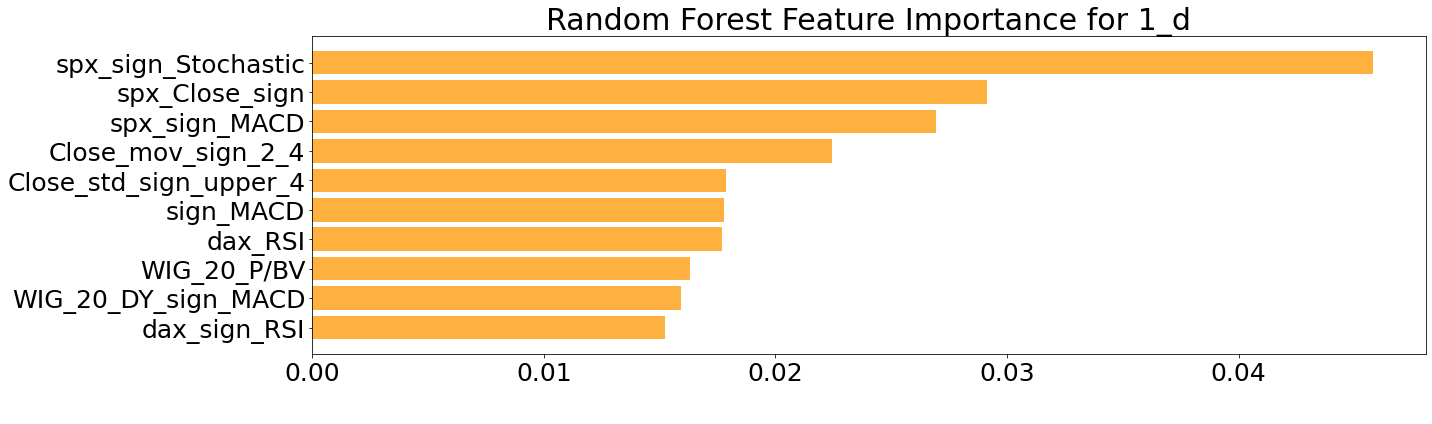

7_d
Score on test set: 0.5440860215053763



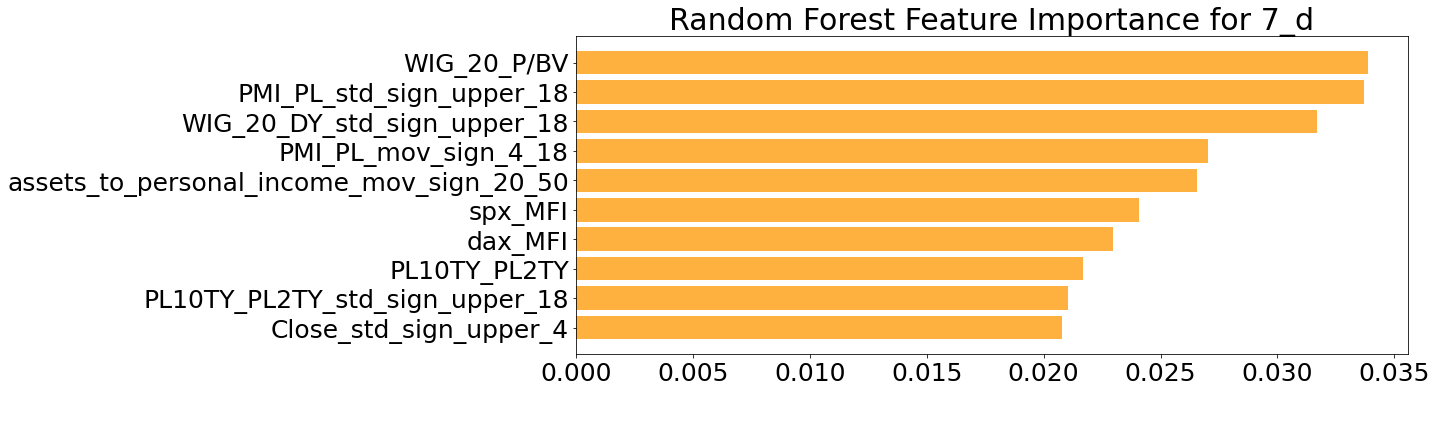

1_m
Score on test set: 0.5311827956989247



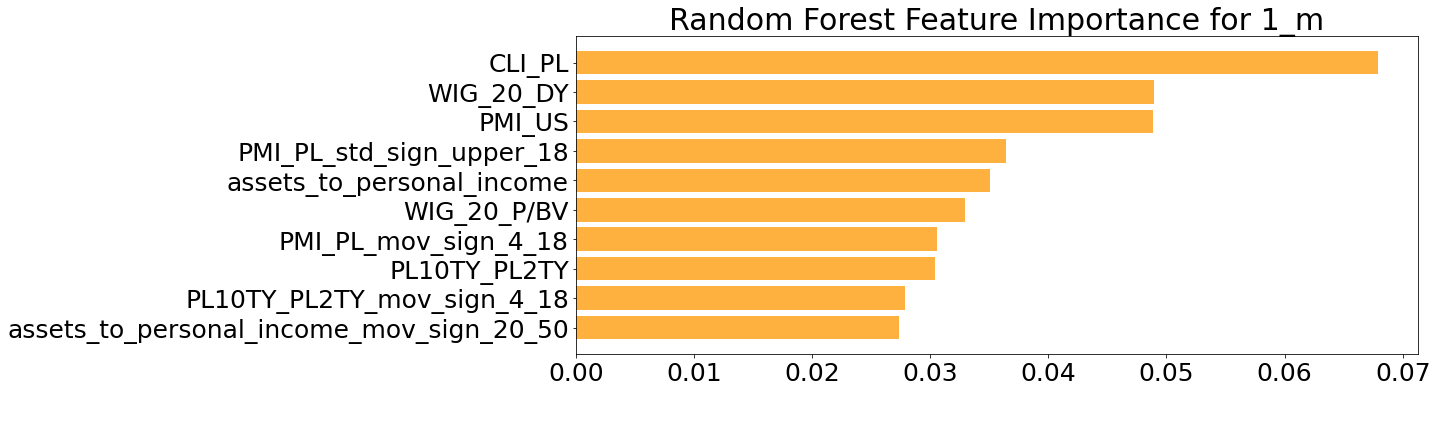

6_m
Score on test set: 0.5505376344086022



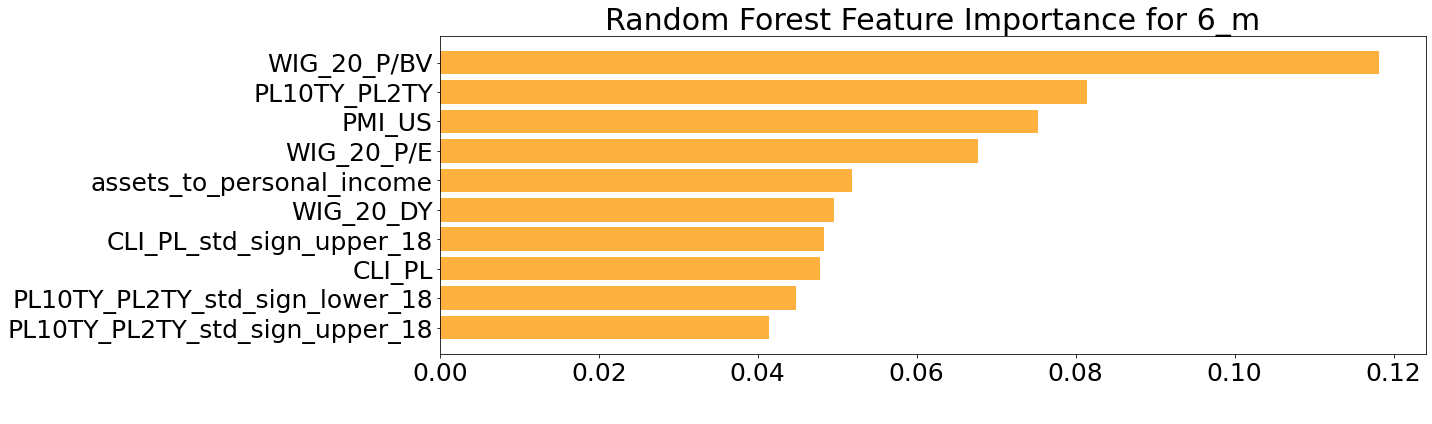

1_y
Score on test set: 0.6688172043010753



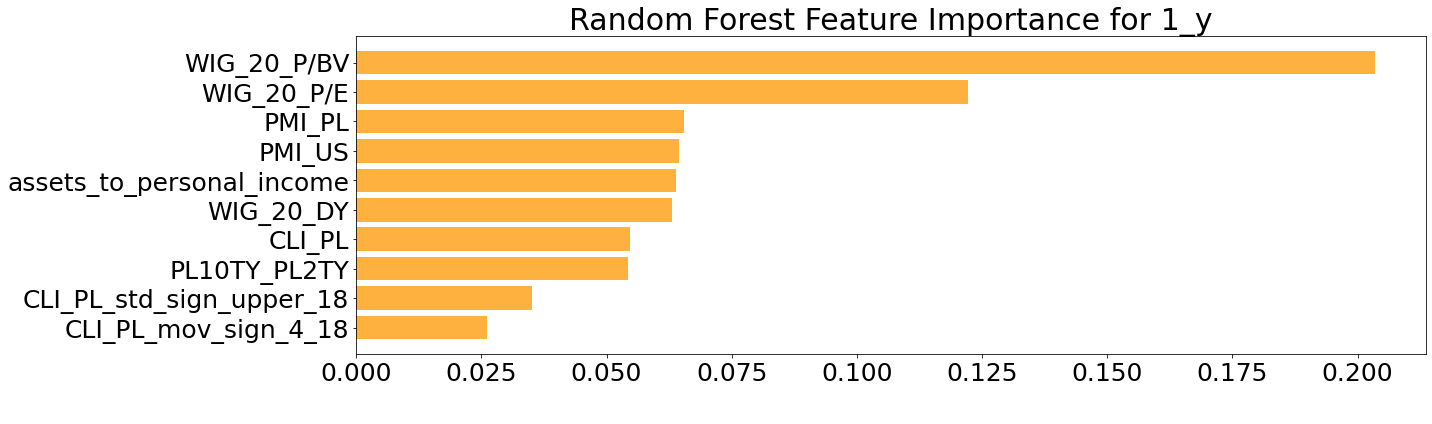

In [25]:
model_feature_importance = RandomForestClassifier(n_estimators = 1000, max_depth = 5,
                                                  n_jobs = -1, random_state = 123)
df_feature_importance = pd.DataFrame()
for y in y_values:
    print(y['name'])
    model_feature_importance.fit(X_train, y['train'])
    print(f'Score on test set: {model_feature_importance.score(X_test, y["test"])}')
    print()
    feature_importance = model_feature_importance.feature_importances_.argsort()
    feature_importance = pd.DataFrame({
        f'column_{y["name"]}':X.columns[feature_importance],
        f'importance_{y["name"]}':model_feature_importance.feature_importances_[feature_importance]
    })
    df_feature_importance = pd.concat([df_feature_importance, feature_importance], axis=1)
    
    plt.figure(figsize=(20, 6))
    plt.barh(df_feature_importance[f'column_{y["name"]}'][-10:],
             df_feature_importance[f'importance_{y["name"]}'][-10:], color='#FFB13F')
    plt.tick_params(axis='both', labelsize=25)
    plt.title(f'Random Forest Feature Importance for {y["name"]}', size=30)
    plt.xlabel(' ', size=27.5)
    plt.tight_layout()
    plt.show()

### PCA data explanation

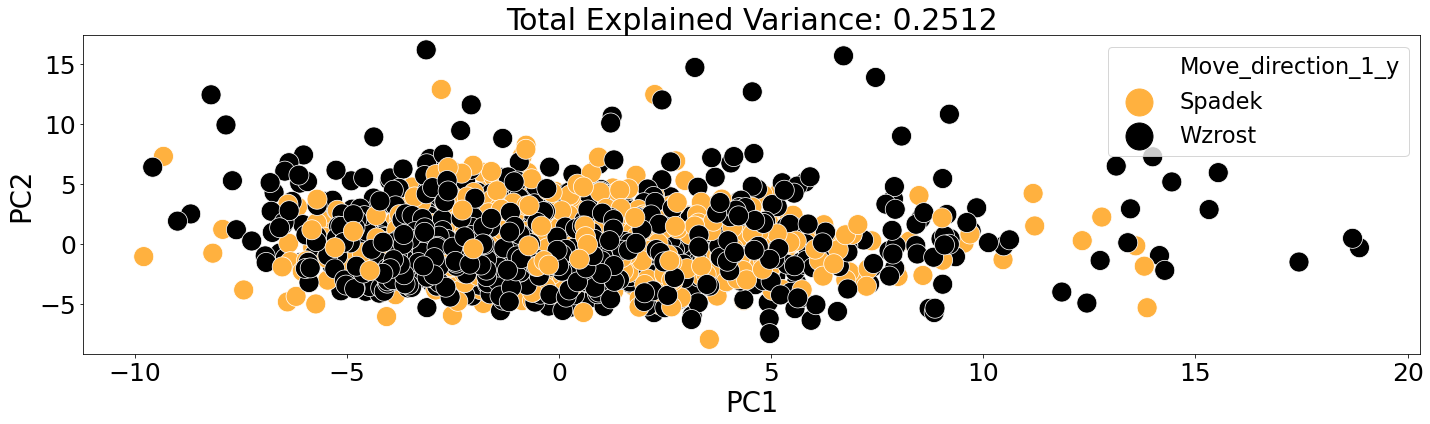

In [26]:
pca_explained_data_2dim = PCA(n_components=2)
components_2_dim = pca_explained_data_2dim.fit_transform(scale(X_train))

var = pca_explained_data_2dim.explained_variance_ratio_.sum()

y_train_labels = y_1_y_train.apply(lambda x: 'Wzrost' if x == 1 else 'Spadek')

fig, ax = plt.subplots()
fig.set_size_inches(20, 6)


colors = ["#FFB13F", "#000000"]
sns.set_palette(sns.color_palette(colors))

sns.scatterplot(x=0, y=1, data=pd.merge(pd.DataFrame(components_2_dim),
                                    pd.DataFrame(y_train_labels.reset_index(drop=True)),
                                    how='outer', left_index=True, right_index=True),
           hue=y_train_labels.name, s=400)

plt.xlabel('PC1', size=27.5)
plt.ylabel('PC2', size=27.5)
plt.title(f'Total Explained Variance: {np.round(var, 4)}', size=30)
plt.tick_params(axis='both', labelsize=25)
plt.legend(loc="upper right", markerscale=4.5, scatterpoints=1, fontsize=22.5)

plt.tight_layout()
plt.show()

# Train models

### Baseline model

In [30]:
metrics_dataframe = pd.DataFrame(columns = ['f1_1_d', 'AUC_1_d',
                                            'f1_7_d', 'AUC_7_d',
                                            'f1_1_m', 'AUC_1_m',
                                            'f1_6_m', 'AUC_6_m',
                                            'f1_1_y', 'AUC_1_y',])

In [31]:
baseline_classifiers = [
    {
        'name': 'DummyClassifier_1_d',
        'class': DummyClassifier(),
        'params': {
            'classifier__strategy': ['stratified', 'most_frequent', 'prior', 'uniform']
           }
    },
    {
        'name': 'DummyClassifier_7_d',
        'class': DummyClassifier(),
        'params': {
            'classifier__strategy': ['stratified', 'most_frequent', 'prior', 'uniform']
           }
    },
    {
        'name': 'DummyClassifier_1_m',
        'class': DummyClassifier(),
        'params': {
            'classifier__strategy': ['stratified', 'most_frequent', 'prior', 'uniform']
           }
    },
    {
        'name': 'DummyClassifier_6_m',
        'class': DummyClassifier(),
        'params': {
            'classifier__strategy': ['stratified', 'most_frequent', 'prior', 'uniform']
           }
    },
    {
        'name': 'DummyClassifier_1_y',
        'class': DummyClassifier(),
        'params': {
            'classifier__strategy': ['stratified', 'most_frequent', 'prior', 'uniform']
           }
    }
]

In [33]:
for model, y in zip(baseline_classifiers, y_values):
    print(y['name'])
    pipeline = Pipeline(steps=[('classifier', model['class'])])
    cv = TimeSeriesSplit(n_splits=10).split(X_train)
    baseline = GridSearchCV(pipeline, model['params'], cv=cv, n_jobs=-1, scoring = 'f1')
    baseline.fit(X_train, y['train'])
    metrics_dataframe.loc['baseline', f'f1_{y["name"]}'] = metrics.f1_score(y['test'], baseline.predict(X_test))
    metrics_dataframe.loc['baseline', f'AUC_{y["name"]}'] = metrics.roc_auc_score(y['test'],
                                                                                            baseline.predict_proba(X_test)[:,1])
metrics_dataframe

1_d
7_d
1_m
6_m
1_y


,f1_1_d,AUC_1_d,f1_7_d,AUC_7_d,f1_1_m,AUC_1_m,f1_6_m,AUC_6_m,f1_1_y,AUC_1_y
baseline,0.505543,0.5,0.522678,0.500287,0.678977,0.5,0.507223,0.5,0.402062,0.5


### Stump model

In [34]:
stump_classifiers = [
    {
        'name': 'Stump_1_d',
        'class': DecisionTreeClassifier(),
        'params': {
            'classifier__max_depth': [1]
           }
    },
    {
        'name': 'Stump_7_d',
        'class': DecisionTreeClassifier(),
        'params': {
            'classifier__max_depth': [1]
           }
    },
    {
        'name': 'Stump_1_m',
        'class': DecisionTreeClassifier(),
        'params': {
            'classifier__max_depth': [1]
           }
    },
    {
        'name': 'Stump_6_m',
        'class': DecisionTreeClassifier(),
        'params': {
            'classifier__max_depth': [1]
           }
    },
    {
        'name': 'Stump_1_y',
        'class': DecisionTreeClassifier(),
        'params': {
            'classifier__max_depth': [1]
           }
    }
]

In [35]:
for model, y in zip(stump_classifiers, y_values):
    print(y['name'])
    pipeline = Pipeline(steps=[('classifier', model['class'])])
    cv = TimeSeriesSplit(n_splits=10).split(X_train)
    stump = GridSearchCV(pipeline, model['params'], cv=cv, n_jobs=-1, scoring = 'f1')
    stump.fit(X_train, y['train'])
    metrics_dataframe.loc['stump', f'f1_{y["name"]}'] = metrics.f1_score(y['test'], stump.predict(X_test))
    metrics_dataframe.loc['stump', f'AUC_{y["name"]}'] = metrics.roc_auc_score(y['test'],
                                                                               stump.predict_proba(X_test)[:,1])
metrics_dataframe

1_d
7_d
1_m
6_m
1_y


,f1_1_d,AUC_1_d,f1_7_d,AUC_7_d,f1_1_m,AUC_1_m,f1_6_m,AUC_6_m,f1_1_y,AUC_1_y
baseline,0.505543,0.500000,0.522678,0.500287,0.678977,0.500000,0.507223,0.5,0.402062,0.5
stump,0.640940,0.552218,0.612546,0.544775,0.639370,0.497695,0.000000,0.5,0.000000,0.5


### Decision tree model

In [36]:
tree_classifiers = [
    {
        'name': 'Tree_1_d',
        'class': DecisionTreeClassifier(),
        'params': {
            'classifier__max_depth': [3]
           }
    },
    {
        'name': 'Tree_7_d',
        'class': DecisionTreeClassifier(),
        'params': {
            'classifier__max_depth': [3]
           }
    },
    {
        'name': 'Tree_1_m',
        'class': DecisionTreeClassifier(),
        'params': {
            'classifier__max_depth': [3]
           }
    },
    {
        'name': 'Tree_6_m',
        'class': DecisionTreeClassifier(),
        'params': {
            'classifier__max_depth': [3]
           }
    },
    {
        'name': 'Tree_1_y',
        'class': DecisionTreeClassifier(),
        'params': {
            'classifier__max_depth': [3]
           }
    }
]

In [37]:
for model, y in zip(tree_classifiers, y_values):
    print(y['name'])
    pipeline = Pipeline(steps=[('classifier', model['class'])])
    cv = TimeSeriesSplit(n_splits=10).split(X_train)
    tree = GridSearchCV(pipeline, model['params'], cv=cv, n_jobs=-1, scoring = 'f1')
    tree.fit(X_train, y['train'])
    metrics_dataframe.loc['tree', f'f1_{y["name"]}'] = metrics.f1_score(y['test'], tree.predict(X_test))
    metrics_dataframe.loc['tree', f'AUC_{y["name"]}'] = metrics.roc_auc_score(y['test'],
                                                                              tree.predict_proba(X_test)[:,1])
metrics_dataframe

1_d
7_d
1_m
6_m
1_y


,f1_1_d,AUC_1_d,f1_7_d,AUC_7_d,f1_1_m,AUC_1_m,f1_6_m,AUC_6_m,f1_1_y,AUC_1_y
baseline,0.505543,0.500000,0.522678,0.500287,0.678977,0.500000,0.507223,0.500000,0.402062,0.500000
stump,0.640940,0.552218,0.612546,0.544775,0.639370,0.497695,0.000000,0.500000,0.000000,0.500000
tree,0.428198,0.538357,0.432184,0.488746,0.639370,0.497695,0.000000,0.661238,0.000000,0.428161


### Random Forest

In [38]:
random_forest_classifiers = [
    {
        'name': 'Random_Forest_1_d',
        'class': RandomForestClassifier(random_state=123),
        'params': {
            'classifier__max_depth': [3, 5, 10],
            'classifier__n_estimators': [200, 600, 1000],
            'classifier__criterion' :['gini', 'entropy'],
            'classifier__max_features': ['auto', 'sqrt', 'log2']
           }
    },
    {
        'name': 'Random_Forest_7_d',
        'class': RandomForestClassifier(random_state=123),
        'params': {
            'classifier__max_depth': [3, 5, 10],
            'classifier__n_estimators': [200, 600, 1000],
            'classifier__criterion' :['gini', 'entropy'],
            'classifier__max_features': ['auto', 'sqrt', 'log2']
           }
    },
    {
        'name': 'Random_Forest_1_m',
        'class': RandomForestClassifier(random_state=123),
        'params': {
            'classifier__max_depth': [3, 5, 10],
            'classifier__n_estimators': [200, 600, 1000],
            'classifier__criterion' :['gini', 'entropy'],
            'classifier__max_features': ['auto', 'sqrt', 'log2']
           }
    },
    {
        'name': 'Random_Forest_6_m',
        'class': RandomForestClassifier(random_state=123),
        'params': {
            'classifier__max_depth': [3, 5, 10],
            'classifier__n_estimators': [200, 600, 1000],
            'classifier__criterion' :['gini', 'entropy'],
            'classifier__max_features': ['auto', 'sqrt', 'log2']
           }
    },
    {
        'name': 'Random_Forest_1_y',
        'class': RandomForestClassifier(random_state=123),
        'params': {
            'classifier__max_depth': [3, 5, 10],
            'classifier__n_estimators': [200, 600, 1000],
            'classifier__criterion' :['gini', 'entropy'],
            'classifier__max_features': ['auto', 'sqrt', 'log2']
           }
    }
]

In [39]:
for model, y in zip(random_forest_classifiers, y_values):
    print(y['name'])
    pipeline = Pipeline(steps=[('classifier', model['class'])])
    cv = TimeSeriesSplit(n_splits=10).split(X_train)
    forest = GridSearchCV(pipeline, model['params'], cv=cv, n_jobs=-1, scoring = 'f1')
    forest.fit(X_train, y['train'])
    metrics_dataframe.loc['forest', f'f1_{y["name"]}'] = metrics.f1_score(y['test'], forest.predict(X_test))
    metrics_dataframe.loc['forest', f'AUC_{y["name"]}'] = metrics.roc_auc_score(y['test'],
                                                                                forest.predict_proba(X_test)[:,1])
metrics_dataframe

1_d
7_d
1_m
6_m
1_y


,f1_1_d,AUC_1_d,f1_7_d,AUC_7_d,f1_1_m,AUC_1_m,f1_6_m,AUC_6_m,f1_1_y,AUC_1_y
baseline,0.505543,0.500000,0.522678,0.500287,0.678977,0.500000,0.507223,0.500000,0.402062,0.500000
stump,0.640940,0.552218,0.612546,0.544775,0.639370,0.497695,0.000000,0.500000,0.000000,0.500000
tree,0.428198,0.538357,0.432184,0.488746,0.639370,0.497695,0.000000,0.661238,0.000000,0.428161
forest,0.578512,0.582107,0.590291,0.572780,0.665658,0.451772,0.555360,0.559539,0.390244,0.626903


### XGBoost Classifier model

In [40]:
xgb_classifiers = [
    {
        'name': 'XGB_1_d',
        'class': XGBClassifier(random_state=123),
        'params': {
            'classifier__max_depth': [2, 5, 7],
            'classifier__n_estimators': [60, 120, 240],
            'classifier__learning_rate' : [0.1, 0.01, 0.05]
           }
    },
    {
        'name': 'XGB_7_d',
        'class': XGBClassifier(random_state=123),
        'params': {
            'classifier__max_depth': [2, 5, 7],
            'classifier__n_estimators': [60, 120, 240],
            'classifier__learning_rate' : [0.1, 0.01, 0.05]
           }
    },
    {
        'name': 'XGB_1_m',
        'class': XGBClassifier(random_state=123),
        'params': {
            'classifier__max_depth': [2, 5, 7],
            'classifier__n_estimators': [60, 120, 240],
            'classifier__learning_rate' : [0.1, 0.01, 0.05]
           }
    },
    {
        'name': 'XGB_6_m',
        'class': XGBClassifier(random_state=123),
        'params': {
            'classifier__max_depth': [2, 5, 7],
            'classifier__n_estimators': [60, 120, 240],
            'classifier__learning_rate' : [0.1, 0.01, 0.05]
           }
    },
    {
        'name': 'XGB_1_y',
        'class': XGBClassifier(random_state=123),
        'params': {
            'classifier__max_depth': [2, 5, 7],
            'classifier__n_estimators': [60, 120, 240],
            'classifier__learning_rate' : [0.1, 0.01, 0.05]
           }
    }
]

In [41]:
for model, y in zip(xgb_classifiers, y_values):
    print(y['name'])
    pipeline = Pipeline(steps=[('classifier', model['class'])])
    cv = TimeSeriesSplit(n_splits=10).split(X_train)
    xgb = GridSearchCV(pipeline, model['params'], cv=cv, n_jobs=-1, scoring = 'f1')
    xgb.fit(X_train, y['train'])
    metrics_dataframe.loc['xgb', f'f1_{y["name"]}'] = metrics.f1_score(y['test'], xgb.predict(X_test))
    metrics_dataframe.loc['xgb', f'AUC_{y["name"]}'] = metrics.roc_auc_score(y['test'],
                                                                             xgb.predict_proba(X_test)[:,1])
metrics_dataframe

1_d


D:\Programy\Anaconda\lib\site-packages\xgboost\sklearn.py:892: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:02:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
7_d


D:\Programy\Anaconda\lib\site-packages\xgboost\sklearn.py:892: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:05:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
1_m


D:\Programy\Anaconda\lib\site-packages\xgboost\sklearn.py:892: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:09:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
6_m


D:\Programy\Anaconda\lib\site-packages\xgboost\sklearn.py:892: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:12:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
1_y


D:\Programy\Anaconda\lib\site-packages\xgboost\sklearn.py:892: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:14:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,f1_1_d,AUC_1_d,f1_7_d,AUC_7_d,f1_1_m,AUC_1_m,f1_6_m,AUC_6_m,f1_1_y,AUC_1_y
baseline,0.505543,0.500000,0.522678,0.500287,0.678977,0.500000,0.507223,0.500000,0.402062,0.500000
stump,0.640940,0.552218,0.612546,0.544775,0.639370,0.497695,0.000000,0.500000,0.000000,0.500000
tree,0.428198,0.538357,0.432184,0.488746,0.639370,0.497695,0.000000,0.661238,0.000000,0.428161
forest,0.578512,0.582107,0.590291,0.572780,0.665658,0.451772,0.555360,0.559539,0.390244,0.626903
xgb,0.580769,0.535819,0.454545,0.529245,0.586387,0.520476,0.494279,0.571806,0.646840,0.880612
